## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Jeffery Rosario
Student pace : part time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import requests
import json
import re
import matplotlib as plt
import seaborn
%matplotlib inline

Let's first begin to do the exploratory data analysis and ose some questions. 

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

Let's pose some questions for data analysis:

1. What type/genres of films are making the most money? 
2. How much profit? Let's look at gross and profit margin.
3. Does the time period the movie is released important to the amount of money you can make?
 

Let's start by importing the files and defining our functions as well. Some functions we are defining here:

1. Reading .csv file into a DataFrame
2. Converting genre_ids to genres
3. Converting a string to a list
4. Converting an object to an integer

In [2]:

file_budgets = './zippedData/tn.movie_budgets.csv.gz' 
file_movies = './zippedData/tmdb.mOvies.csv.gz'

def read_df_file(filename): # read the file into a pandas DataFrame
    df = pd.read_csv(filename, compression = 'gzip', error_bad_lines = False, na_values = '.')
    return(df)


def get_keys(path):
    with open(path) as f:
        return json.load(f)
    
def convert_genre_ids(genre_ids): # generate a dictionary of genres from the genre_ids
    genre_ids_dict = {
      "28": "Action",
      "12": "Adventure",
      "16": "Animation",
      "35": "Comedy",
      "80": "Crime",
      "99": "Documentary",
      "18": "Drama",
      "10751": "Family",
      "14" : "Fantasy",
      "36": "History",
      "27": "Horror",
      "10402": "Music",
      "9648": "Mystery",
      "10749": "Romance",
      "878": "Science Fiction",
      "10770": "TV Movie",
      "53": "Thriller",
      "10752": "War",
      "37": "Western"
    }
    genre_ids = conv_str_to_lst(genre_ids)
    genre_list = []
    for genre_id in genre_ids:
        genre_list.append(genre_ids_dict[genre_id])
        #print(genre_list.append(genre_ids_dict[genre_id]))
    genre_list = tuple(genre_list)
    return genre_list
    
def conv_str_to_lst(str):
    match = re.compile('\d+')
    match = match.findall(str)
    match.sort()
    return match

def conv_object_to_int(s):
    match = re.compile('\d+')
    match = match.findall(s)
    integer = [str(m) for m in match]
    res = int("".join(integer))
    return res
  

keys = get_keys('/Users/Jeffery Rosario/.secret/moviedb_api.json')


Now we can read our .csv files into a Pandas DataFrame. We are reading our budgets and movie .csv files from MovieDB.com. You can use an api to access their data. Let's set the index for each of the dataframes to the title of the movie and remove some irrelevant columns for each dataframe. Let's also change the genre_ids to their human readable formats.

In [3]:
budgets_df = read_df_file(file_budgets)
movies_df = read_df_file(file_movies)

movies_df.set_index('title', inplace = True)     #set the index to title
movies_df.drop(['Unnamed: 0', 'original_title', 'id'], axis=1, inplace = True)    #drop irrelevant columns
movies_df = movies_df[movies_df.genre_ids != '[]']    #remove rows with genre unknown

budgets_df.drop(['id'], axis = 1, inplace = True)     #drop columns that are irrelevant
budgets_df.set_index(['movie'], inplace = True)         #set the index
budgets_df.index.names = ['title']

movies_df['genre'] = movies_df['genre_ids'].map(convert_genre_ids)

To compare our budgets and movies DataFrames, we need to join them. We do this on their title column. 

In [4]:
bm_df = budgets_df.join(movies_df, how = 'left', on = 'title', lsuffix = 'l_suffix', rsuffix = 'r_suffix' )

Let's make sure our data is not missing any data points.

In [5]:
bm_df.isna().sum()

release_datel_suffix       0
production_budget          0
domestic_gross             0
worldwide_gross            0
genre_ids               3830
original_language       3830
popularity              3830
release_dater_suffix    3830
vote_average            3830
vote_count              3830
genre                   3830
dtype: int64

This data seems to be lost in translation so we will need to drop them.

In [6]:
bm_df.dropna(inplace = True)

Let's inspect our data:

In [7]:
bm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2320 entries, Avatar to Newlyweds
Data columns (total 11 columns):
release_datel_suffix    2320 non-null object
production_budget       2320 non-null object
domestic_gross          2320 non-null object
worldwide_gross         2320 non-null object
genre_ids               2320 non-null object
original_language       2320 non-null object
popularity              2320 non-null float64
release_dater_suffix    2320 non-null object
vote_average            2320 non-null float64
vote_count              2320 non-null float64
genre                   2320 non-null object
dtypes: float64(3), object(8)
memory usage: 217.5+ KB


Now our production_budget, domestic_gross and worldwide_gross columns are objects. This will not allow us to perform quantitative analysis on them. So let's convert them to integers using our function we created earlier.

In [8]:
bm_df['production_budget'] = bm_df['production_budget'].map(conv_object_to_int)
bm_df['domestic_gross'] = bm_df['domestic_gross'].map(conv_object_to_int)
bm_df['worldwide_gross'] = bm_df['worldwide_gross'].map(conv_object_to_int)

,title,release_datel_suffix,production_budget,domestic_gross,worldwide_gross,genre_ids,original_language,popularity,release_dater_suffix,vote_average,vote_count,genre,gross_margin_worldwide
0,Avatar,2009-12-18,425000000,760507625,2776345279,"[28, 12, 14, 878]",en,26.526,2009-12-18,7.4,18676.0,"(Adventure, Fantasy, Action, Science Fiction)",2351345279
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,"[12, 28, 14]",en,30.579,2011-05-20,6.4,8571.0,"(Adventure, Fantasy, Action)",635063875
2,Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,"[28, 12, 878]",en,44.383,2015-05-01,7.3,13457.0,"(Adventure, Action, Science Fiction)",1072413963
3,Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,"[12, 28, 14]",en,80.773,2018-04-27,8.3,13948.0,"(Adventure, Fantasy, Action)",1748134200
8,The Dark Knight Rises,2012-07-20,275000000,448139099,1084439099,"[28, 80, 18, 53]",en,26.220,2012-07-20,7.7,13933.0,"(Drama, Action, Thriller, Crime)",809439099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,Exeter,2015-03-26,25000,0,489792,"[53, 27]",en,5.934,2015-03-26,4.7,121.0,"(Horror, Thriller)",464792
2316,Ten,2014-03-28,25000,0,0,"[12, 27, 9648, 53]",en,1.575,2014-03-28,5.4,5.0,"(Adventure, Horror, Thriller, Mystery)",-25000
2317,Dry Spell,2013-02-14,22000,0,0,"[35, 10749]",en,0.600,2013-02-14,6.0,1.0,"(Romance, Comedy)",-22000
2318,All Superheroes Must Die,2013-01-04,20000,0,0,"[878, 53]",en,2.078,2013-01-04,3.9,19.0,"(Thriller, Science Fiction)",-20000


Let's check to see if there are any duplicates in our data, and remove any duplicates in our data.

In [9]:
bm_df.duplicated().value_counts()

False    2147
True      173
dtype: int64

In [10]:
bm_df.reset_index(inplace=True)

In [11]:
bm_df.drop_duplicates(subset = ['title'], keep = False, inplace = True)

Let's add one more column. This will give us the profit margin of each movie.

In [55]:
bm_df.domestic_gross.replace(to_replace = 0, value = bm2_df['domestic_gross'].mean(), inplace = True)

In [56]:
bm_df['profit_margin'] = (bm_df['worldwide_gross'] - bm_df['production_budget'])/bm_df['worldwide_gross']

In [13]:
bm_df['gross_margin_worldwide'] = bm_df['worldwide_gross'] - bm_df['production_budget']

In [14]:
bm_df['release_datel_suffix'] = pd.to_datetime(bm_df['release_dater_suffix'])

Let's create a copy of this DataFrame so we can mess around with it a bit in our data analysis.

In [16]:
bm2_df = bm_df.copy()

We should remove any genre with less than 10 movies so we don't have any outliers.

In [34]:
bm2_df = bm2_df.groupby('genre').filter(lambda x: len(x) > 10) # only capture genres with 10+ movies

In [41]:
groupby_df = bm2_df.groupby(['genre']).mean().copy()

In [42]:
groupby_df['profit_margin'] = (groupby_df['worldwide_gross'] - groupby_df['production_budget'])/groupby_df['worldwide_gross']

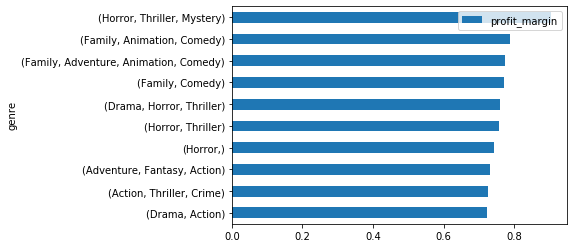

In [46]:
groupby_df.sort_values(by = 'profit_margin').tail(10).plot( y ='profit_margin', kind = 'barh')

In [50]:
bm_df.worldwide_gross.replace(to_replace= 0, value = bm2_df['worldwide_gross'].mean(), inplace = True)

In [40]:
bm2_df.groupby(['genre'])

genre
(Action, Comedy)                           12
(Action, Comedy, Crime)                    13
(Action, Thriller)                         24
(Action, Thriller, Crime)                  29
(Adventure, Action, Science Fiction)       30
(Adventure, Fantasy, Action)               17
(Comedy,)                                  96
(Documentary,)                             38
(Drama,)                                  121
(Drama, Action)                            12
(Drama, Action, Thriller)                  12
(Drama, Action, Thriller, Crime)           19
(Drama, Comedy)                            59
(Drama, Crime)                             13
(Drama, History)                           20
(Drama, Horror, Thriller)                  11
(Drama, Thriller)                          32
(Drama, Thriller, Crime)                   28
(Drama, Thriller, Mystery)                 11
(Family, Adventure, Animation, Comedy)     23
(Family, Animation, Comedy)                11
(Family, Comedy)            

In [81]:
bm_groupby_df['profit_margin'].mean().sort_values(by = 'profit_margin').tail().plot(kind = 'bar')

AttributeError: 'float' object has no attribute 'sort_values'

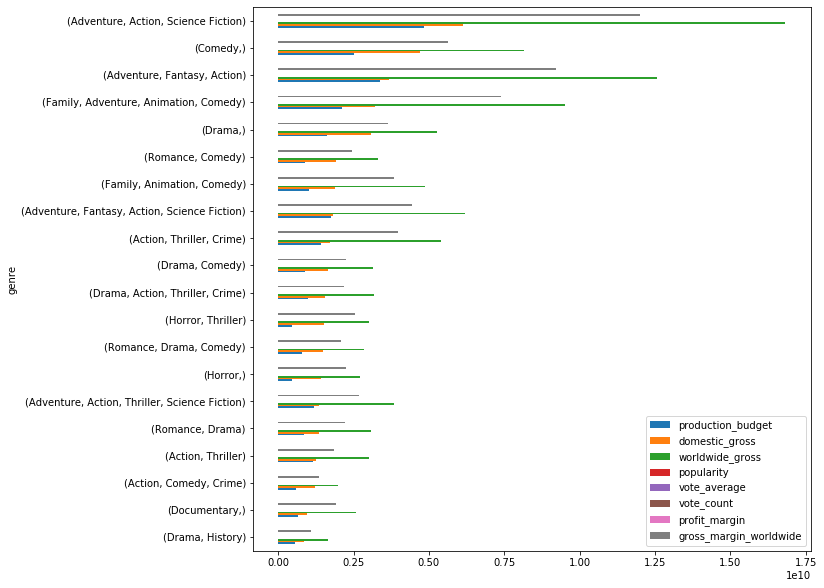

In [82]:
#bm_to_pivot.plot(figsize = (10,10), kind = 'barh')
bm_df.groupby(['genre']).sum().sort_values(by = 'domestic_gross', ascending = True).tail(20).plot(kind = 'barh', figsize =(10,10))

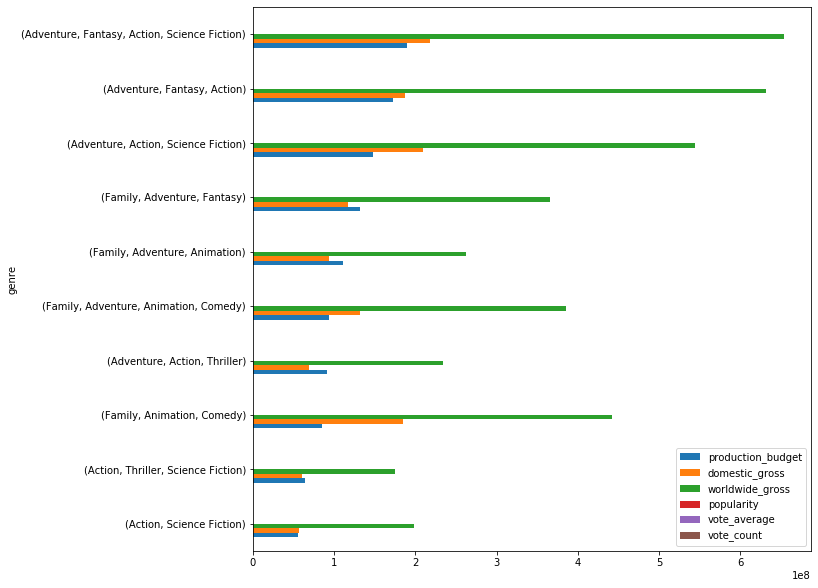

In [21]:
bm2_df.groupby(['genre']).mean().sort_values(by ='production_budget').tail(10).plot(kind = 'barh', figsize = (10,10))

In [34]:
df = bm2_df.groupby(['genre']).mean()

In [ ]:
bm2_df.drop(['production_budget/worldwide_gross', 'production_budget - worldwide_gross'], axis = 1, inplace = True)

In [ ]:
df['profit_margin'] = (df['worldwide_gross'] - df['production_budget'])/(df['worldwide_gross'])

In [ ]:
df.reset_index(inplace = True)

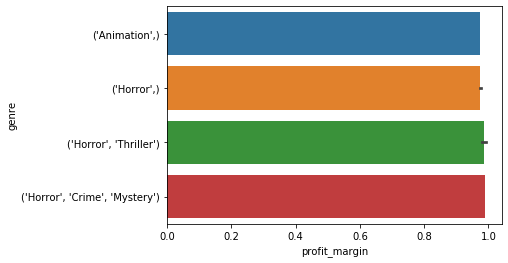

In [84]:
profit_margin = bm2_df[['genre', 'profit_margin']].sort_values(by = 'profit_margin', ascending = True).tail(10)

#genre
profit_margin
seaborn.barplot(x = profit_margin['profit_margin'], y = profit_margin['genre'])

In [ ]:
bm2_df.loc[bm2_df['title'] == 'Frozen']

In [ ]:
bm2_df.groupby(bm2_df['release_datel_suffix'].dt.month).mean().plot(kind = 'bar', figsize = (10,10))


In [ ]:
bm2_df.drop(['popularity', 'vote_average', 'vote_count'], axis = 1 ,inplace = True)